## Density Models Assignment

In [16]:
# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

#import numpy
import numpy as np

# from sklearn import make_blobs
from sklearn.datasets import make_blobs

# import DBSCAN
from sklearn.cluster import DBSCAN

# import Kmeans from sklearn
from sklearn.cluster import KMeans

## Task: Generate clusters with make_blobs function 

Use the following settings:
   * n_samples=150,
   * n_features=2,
   * centers=3,
   * cluster_std=0.6,
   * random_state=0

In [22]:
# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.6,
                  random_state=0)




* plot data points

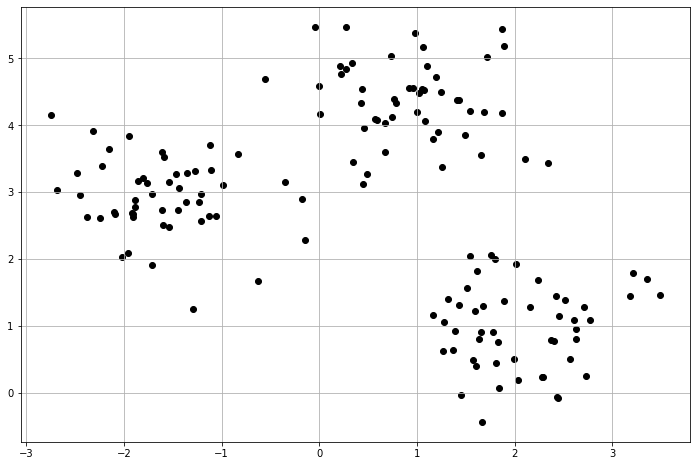

In [23]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

* define function plot_clusters

In [19]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
# fit and predict
y_km = km.fit_predict(X)

In [20]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

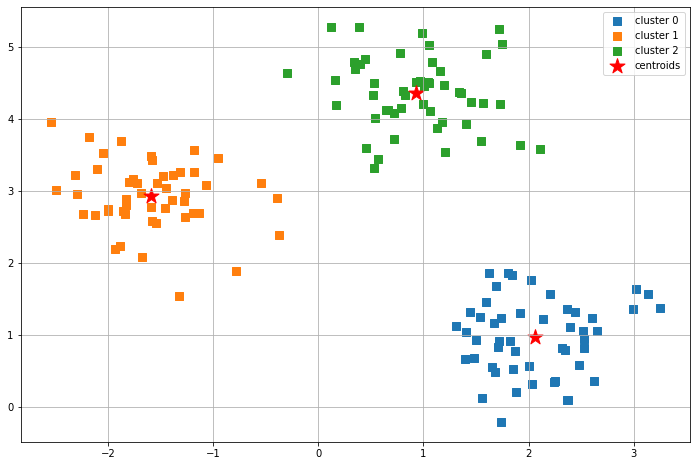

In [21]:

 # plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)

## Objective: 
Try to find optimal settings of `eps` and `min_samples` params of DBSCAN. You can iterate over multiple parameters combinations and plot the clustering results.

* define params space: two lists with `eps` and `min_samples` respectively

In [43]:
eps_values = [1.8,0.22345,0.23,0.8]
min_samples_values = [1,3]

* combinations (hint: use 'product' function from 'itertools')

In [44]:
from itertools import product
combinations = list(product(eps_values,min_samples_values))
combinations
for com in combinations:
    eps_values, min_samples_values = com
    
    # Fit DBSCAN
    db = DBSCAN(eps=eps_values,
                min_samples=min_samples_values,
                metric='euclidean')

    y_db = db.fit_predict(X)


- fit DBSCAN for each combinations and plot the results

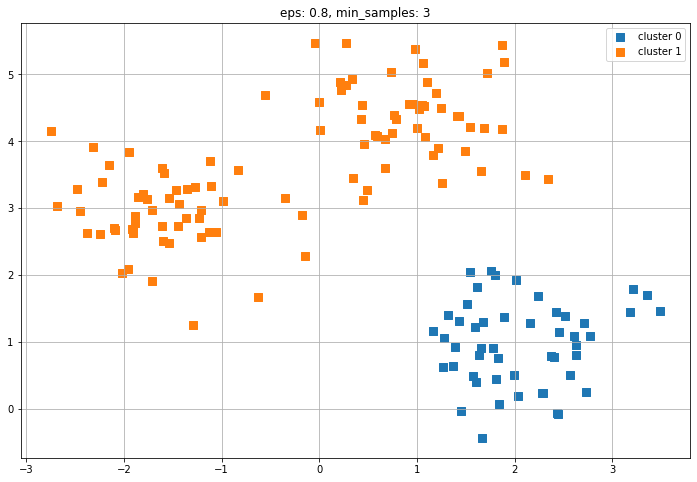

In [45]:
# Plot DBSCAN clusters
plt.title(f'eps: {eps_values}, min_samples: {min_samples_values}')
plot_clusters(X,y_db)